In [1]:
import pandas as pd
import numpy as np

#Sales data import 
data_sales = pd.read_csv("sales_data.csv", header=0, sep=";", encoding="ISO-8859-1", low_memory=False, error_bad_lines=False, decimal=",")
data_sales.head(10)

,date,store,item,qty,unit_price,item_category
0,2017-07-05,43,43,61,10.08,13
1,2018-01-20,43,295,73,13.30,13
2,2017-07-10,43,296,145,11.90,13
3,2017-07-01,43,295,255,13.30,13
4,2017-05-23,43,43,267,10.08,13
5,2017-06-24,43,43,242,10.08,13
6,2017-03-23,43,43,200,10.08,13
7,2018-01-19,43,296,121,11.90,13
8,2017-03-22,43,296,48,11.90,13
9,2017-09-02,43,43,182,10.08,13


In [2]:
#Store data import
data_store = pd.read_csv("store_master.csv", header=0, sep=";", encoding="ISO-8859-1", low_memory=False, error_bad_lines=False, decimal=",")
data_store.head(10)

,store,latitude,longitude
0,12,37.441565,-3.895500
1,13,37.354920,-5.286651
2,14,38.411953,-3.711638
3,15,37.588718,-1.594786
4,16,37.260362,-1.349004
5,31,37.124257,-3.249158
6,32,39.388903,-4.398468
7,38,37.348541,-1.951421
8,40,37.466706,-2.162790
9,41,38.285265,-3.391351


In [3]:
#there is not any missing value in sales data
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397774 entries, 0 to 397773
Data columns (total 6 columns):
date             397774 non-null object
store            397774 non-null int64
item             397774 non-null int64
qty              397774 non-null int64
unit_price       397774 non-null float64
item_category    397774 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 18.2+ MB


In [4]:
#there is not any null variables in store data
data_sales.isnull().sum()

date             0
store            0
item             0
qty              0
unit_price       0
item_category    0
dtype: int64

In [5]:
#Calculates the percentage of missing values in each column
#Percentage = ((Total of null variables in a column)/(total variables))*100

def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(data_sales)

,Total,Percent
item_category,0,0.0
unit_price,0,0.0
qty,0,0.0
item,0,0.0
store,0,0.0
date,0,0.0


In [6]:
draw_missing_data_table(data_store)

,Total,Percent
longitude,0,0.0
latitude,0,0.0
store,0,0.0


In [7]:
#There may be some mistakes in date column which may not be considered as missing
#I checked those kind of mistakes
data_sales['date'].unique()

array(['2017-07-05', '2018-01-20', '2017-07-10', '2017-07-01',
       '2017-05-23', '2017-06-24', '2017-03-23', '2018-01-19',
       '2017-03-22', '2017-09-02', '2017-10-09', '2018-01-23',
       '2017-09-21', '2017-04-07', '2017-12-09', '2017-08-05',
       '2017-10-25', '2017-07-17', '2017-06-01', '2017-05-27',
       '2017-06-16', '2017-07-27', '2018-01-30', '2017-10-13',
       '2017-07-14', '2017-04-05', '2017-12-26', '2017-06-12',
       '2018-01-05', '2017-11-26', '2017-11-03', '2017-10-26',
       '2017-07-28', '2017-05-09', '2017-03-30', '2017-05-26',
       '2018-01-04', '2017-09-28', '2017-08-16', '2017-04-26',
       '2017-06-03', '2017-04-02', '2017-04-30', '2017-10-28',
       '2017-07-29', '2017-03-29', '2017-05-29', '2017-09-27',
       '2017-10-30', '2017-04-04', '2017-10-02', '2017-12-14',
       '2017-09-18', '2017-05-15', '2017-05-10', '2017-08-08',
       '2017-07-19', '2017-11-06', '2018-01-25', '2017-11-01',
       '2017-07-26', '2017-04-17', '2017-06-21', '2017-

In [8]:
data_sales['store'].unique()

array([43, 52, 42, 74, 75, 53, 31, 67, 15, 38, 13, 41, 40, 16, 45, 44, 65,
       14, 78, 54, 12, 49, 80, 56, 91, 63, 32, 47, 60, 59, 61, 62, 58, 48,
       73, 50, 83, 64, 68, 72, 66, 70, 79, 76, 69, 77, 82, 81])

In [9]:
data_sales['item'].unique()

array([ 43, 295, 296, 231, 114, 209,  75, 119,  79, 232,  70,  76, 120,
        78, 293, 233, 502, 292, 185, 158, 527, 539, 148, 147, 309, 163,
       436, 186, 286, 178, 179, 469, 159, 408, 526, 165, 170, 139, 424,
       519, 156, 528, 561, 446, 109, 108, 501, 234, 401, 225, 290,  73,
       364,  48, 385, 351, 433, 434, 347, 497, 463, 348, 352, 346, 349,
       374, 355, 354, 413, 419, 596, 420, 415, 414, 416, 541, 590, 410,
       465, 589, 127, 132,  44])

In [10]:
data_sales['qty'].unique()

array([  61,   73,  145, ..., 1635, 2405, 1606])

In [11]:
data_sales.head(10)

,date,store,item,qty,unit_price,item_category
0,2017-07-05,43,43,61,10.08,13
1,2018-01-20,43,295,73,13.30,13
2,2017-07-10,43,296,145,11.90,13
3,2017-07-01,43,295,255,13.30,13
4,2017-05-23,43,43,267,10.08,13
5,2017-06-24,43,43,242,10.08,13
6,2017-03-23,43,43,200,10.08,13
7,2018-01-19,43,296,121,11.90,13
8,2017-03-22,43,296,48,11.90,13
9,2017-09-02,43,43,182,10.08,13


In [13]:
#New columns are created by date column
#There may be trends based on weekdays, days, months or year
data_sales['date'] =pd.to_datetime(data_sales.date)
data_sales['year']=data_sales['date'].dt.year
data_sales['month']=data_sales['date'].dt.month
data_sales['Day']=data_sales['date'].dt.day
data_sales['Weekday'] = ( data_sales['date'].dt.weekday ) + 1

In [15]:
data_sales.head(10)

,date,store,item,qty,unit_price,item_category,year,month,Day,Weekday
0,2017-07-05,43,43,61,10.08,13,2017,7,5,3
1,2018-01-20,43,295,73,13.30,13,2018,1,20,6
2,2017-07-10,43,296,145,11.90,13,2017,7,10,1
3,2017-07-01,43,295,255,13.30,13,2017,7,1,6
4,2017-05-23,43,43,267,10.08,13,2017,5,23,2
5,2017-06-24,43,43,242,10.08,13,2017,6,24,6
6,2017-03-23,43,43,200,10.08,13,2017,3,23,4
7,2018-01-19,43,296,121,11.90,13,2018,1,19,5
8,2017-03-22,43,296,48,11.90,13,2017,3,22,3
9,2017-09-02,43,43,182,10.08,13,2017,9,2,6


In [16]:
#there may be a trend on quarter basis
#Therefore for the further analysis <Quarter> column is created
data_sales['Quarter'] = data_sales[['month']].apply(lambda x:'Q1' if x[0]>=1 and x[0]<=3 else ('Q2' if x[0] >= 4 and x[0]<=6 
                                    else ('Q3' if x[0] >= 7 and x[0]<=9
                                    else 'Q4' )), axis=1)

In [17]:
data_sales.head(10)

,date,store,item,qty,unit_price,item_category,year,month,Day,Weekday,Quarter
0,2017-07-05,43,43,61,10.08,13,2017,7,5,3,Q3
1,2018-01-20,43,295,73,13.30,13,2018,1,20,6,Q1
2,2017-07-10,43,296,145,11.90,13,2017,7,10,1,Q3
3,2017-07-01,43,295,255,13.30,13,2017,7,1,6,Q3
4,2017-05-23,43,43,267,10.08,13,2017,5,23,2,Q2
5,2017-06-24,43,43,242,10.08,13,2017,6,24,6,Q2
6,2017-03-23,43,43,200,10.08,13,2017,3,23,4,Q1
7,2018-01-19,43,296,121,11.90,13,2018,1,19,5,Q1
8,2017-03-22,43,296,48,11.90,13,2017,3,22,3,Q1
9,2017-09-02,43,43,182,10.08,13,2017,9,2,6,Q3


In [18]:
data_sales['item_category'].unique()

array([13, 19, 14, 15, 17, 21, 22])

In [19]:
data_sales.sort_values(by='date', ascending=True)

,date,store,item,qty,unit_price,item_category,year,month,Day,Weekday,Quarter
316303,2017-03-15,50,292,194,25.66,13,2017,3,15,3,Q1
121184,2017-03-15,50,225,103,24.99,19,2017,3,15,3,Q1
317113,2017-03-15,77,286,27,15.89,21,2017,3,15,3,Q1
5110,2017-03-15,75,148,46,29.68,17,2017,3,15,3,Q1
385382,2017-03-15,82,185,899,8.30,14,2017,3,15,3,Q1
198736,2017-03-15,47,120,97,39.41,13,2017,3,15,3,Q1
282512,2017-03-15,50,75,139,27.23,13,2017,3,15,3,Q1
316881,2017-03-15,80,170,139,31.82,13,2017,3,15,3,Q1
317441,2017-03-15,82,148,72,29.68,17,2017,3,15,3,Q1
317503,2017-03-15,69,352,222,18.20,21,2017,3,15,3,Q1


In [20]:
#New column called <Total_Price> is created
data_sales['Total_price']=data_sales['unit_price'] * data_sales['qty']

In [22]:
data_sales.head()

,date,store,item,qty,unit_price,item_category,year,month,Day,Weekday,Quarter,Total_price
0,2017-07-05,43,43,61,10.08,13,2017,7,5,3,Q3,614.88
1,2018-01-20,43,295,73,13.30,13,2018,1,20,6,Q1,970.90
2,2017-07-10,43,296,145,11.90,13,2017,7,10,1,Q3,1725.50
3,2017-07-01,43,295,255,13.30,13,2017,7,1,6,Q3,3391.50
4,2017-05-23,43,43,267,10.08,13,2017,5,23,2,Q2,2691.36


In [23]:
#Two tables are joined
data_sales.insert(2, 'latitude', data_sales['store'].map(data_store.set_index('store')['latitude']))

In [24]:
data_sales.head()

,date,store,latitude,item,qty,unit_price,item_category,year,month,Day,Weekday,Quarter,Total_price
0,2017-07-05,43,37.207313,43,61,10.08,13,2017,7,5,3,Q3,614.88
1,2018-01-20,43,37.207313,295,73,13.30,13,2018,1,20,6,Q1,970.90
2,2017-07-10,43,37.207313,296,145,11.90,13,2017,7,10,1,Q3,1725.50
3,2017-07-01,43,37.207313,295,255,13.30,13,2017,7,1,6,Q3,3391.50
4,2017-05-23,43,37.207313,43,267,10.08,13,2017,5,23,2,Q2,2691.36


In [25]:
#Two tables are joined
data_sales.insert(2, 'longitude', data_sales['store'].map(data_store.set_index('store')['longitude']))

In [26]:
data_sales.head()

,date,store,longitude,latitude,item,qty,unit_price,item_category,year,month,Day,Weekday,Quarter,Total_price
0,2017-07-05,43,-5.077215,37.207313,43,61,10.08,13,2017,7,5,3,Q3,614.88
1,2018-01-20,43,-5.077215,37.207313,295,73,13.30,13,2018,1,20,6,Q1,970.90
2,2017-07-10,43,-5.077215,37.207313,296,145,11.90,13,2017,7,10,1,Q3,1725.50
3,2017-07-01,43,-5.077215,37.207313,295,255,13.30,13,2017,7,1,6,Q3,3391.50
4,2017-05-23,43,-5.077215,37.207313,43,267,10.08,13,2017,5,23,2,Q2,2691.36


In [27]:
data_sales.isnull().sum()

date             0
store            0
longitude        0
latitude         0
item             0
qty              0
unit_price       0
item_category    0
year             0
month            0
Day              0
Weekday          0
Quarter          0
Total_price      0
dtype: int64

In [28]:
data_sales.rename(columns={'date': 'Date', 
                           'store': 'Store',
                           'longitude': 'Longitude',
                           'latitude': 'Latitude',
                           'item': 'Item',
                           'qty': 'Quantity',
                           'unit_price': 'Unit_Price',
                           'item_category': 'Item_Category',
                           'year': 'Year',
                           'month': 'Month',
                           'Day': 'Day',
                           'Weekday': 'Weekday',
                           'Quarter': 'Quarter',
                           'Total_price': 'Total_Price'}, inplace=True)

In [29]:
data_sales.head()

,Date,Store,Longitude,Latitude,Item,Quantity,Unit_Price,Item_Category,Year,Month,Day,Weekday,Quarter,Total_Price
0,2017-07-05,43,-5.077215,37.207313,43,61,10.08,13,2017,7,5,3,Q3,614.88
1,2018-01-20,43,-5.077215,37.207313,295,73,13.30,13,2018,1,20,6,Q1,970.90
2,2017-07-10,43,-5.077215,37.207313,296,145,11.90,13,2017,7,10,1,Q3,1725.50
3,2017-07-01,43,-5.077215,37.207313,295,255,13.30,13,2017,7,1,6,Q3,3391.50
4,2017-05-23,43,-5.077215,37.207313,43,267,10.08,13,2017,5,23,2,Q2,2691.36


In [30]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397774 entries, 0 to 397773
Data columns (total 14 columns):
Date             397774 non-null datetime64[ns]
Store            397774 non-null int64
Longitude        397774 non-null float64
Latitude         397774 non-null float64
Item             397774 non-null int64
Quantity         397774 non-null int64
Unit_Price       397774 non-null float64
Item_Category    397774 non-null int64
Year             397774 non-null int64
Month            397774 non-null int64
Day              397774 non-null int64
Weekday          397774 non-null int64
Quarter          397774 non-null object
Total_Price      397774 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 42.5+ MB


In [31]:
#First 10 item in overall
df_item_withoutyear = pd.DataFrame({'Item': data_sales['Item'],
                                    'Quantity': data_sales['Quantity']})

df_item_withoutyear=df_item_withoutyear.groupby('Item').sum()
df_item_withoutyear= df_item_withoutyear.sort_values(by='Quantity', ascending=False)
df_item_withoutyear.iloc[:20]

,Quantity
Item,
185,2577551
186,1782164
416,1370776
385,1256316
519,1046027
179,1034861
408,911951
346,864305
158,823096


In [32]:
df_item_withyear = pd.DataFrame({'Item': data_sales['Item'],
                                 'Quantity': data_sales['Quantity'],
                                 'Year': data_sales['Year']})

df_item_withyear['Year'].unique()


array([2017, 2018, 2019])

In [33]:
df_item_withyear_2017 = df_item_withyear[df_item_withyear['Year']==2017]
df_item_withyear_2018 = df_item_withyear[df_item_withyear['Year']==2018]
df_item_withyear_2019 = df_item_withyear[df_item_withyear['Year']==2019]

In [34]:
df_item_withyear_2017.groupby('Item').sum().sort_values(by='Quantity', ascending=False).iloc[:20]

,Quantity,Year
Item,,
185,2529556,6577437
186,709332,6081255
385,516540,590981
170,467891,6438264
416,458558,2265091
179,453072,6440281
158,414517,6565335
295,401363,3594294
414,382757,2079527


In [35]:
df_item_withyear_2018.groupby('Item').sum().sort_values(by='Quantity', ascending=False).iloc[:20]

,Quantity,Year
Item,,
519,945911,7888362
186,838336,8041730
408,807829,7912578
416,695291,3133954
385,573005,847560
526,524839,5410258
179,464497,8029622
528,434939,5420348
346,423161,9083018


In [36]:
df_item_withyear_2019.groupby('Item').sum().sort_values(by='Quantity', ascending=False).iloc[:20]

,Quantity,Year
Item,,
186,234496,1976601
416,216927,898455
528,216144,1976601
385,166771,359382
589,123597,898455
179,117292,1976601
526,113516,1976601
309,112927,1976601
408,104122,1243704


In [37]:
#Items 186, 416, 385, 179, 408, 346, 352, 348, 436, 465 are chosen for the further analysis
data_sales_final = data_sales[(data_sales['Item']==186) | 
                              (data_sales['Item']==416) |
                              (data_sales['Item']==385) |
                              (data_sales['Item']==179) |
                              (data_sales['Item']==408) |
                              (data_sales['Item']==346) |
                              (data_sales['Item']==352) |
                              (data_sales['Item']==348) |
                              (data_sales['Item']==436) |
                              (data_sales['Item']==465)]

In [38]:
data_sales_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62642 entries, 391 to 397765
Data columns (total 14 columns):
Date             62642 non-null datetime64[ns]
Store            62642 non-null int64
Longitude        62642 non-null float64
Latitude         62642 non-null float64
Item             62642 non-null int64
Quantity         62642 non-null int64
Unit_Price       62642 non-null float64
Item_Category    62642 non-null int64
Year             62642 non-null int64
Month            62642 non-null int64
Day              62642 non-null int64
Weekday          62642 non-null int64
Quarter          62642 non-null object
Total_Price      62642 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 7.2+ MB


In [39]:
# Detecting hidden numbers inside categorical value column if there is any
#the only categorical column is quarter

cntQuarter=0
for row in data_sales_final['Quarter']:
    try:
        int(row)
        data_sales_final.loc[cntQuarter, 'Quarter']=np.nan
    except ValueError:
        pass
    cntQuarter+=1

print('Number of integer value for <Quarter> column :', len(data_sales_final['Quarter'])-cntQuarter)

Number of integer value for <Quarter> column : 0


In [40]:
#OneHotencoding since categoric values are more than 2
#The only categorical value is Quantity column
data_sales_final = pd.get_dummies(data_sales_final, columns=['Quarter'], prefix = ['Quarter'])
data_sales_final.head(50)

,Date,Store,Longitude,Latitude,Item,Quantity,Unit_Price,Item_Category,Year,Month,Day,Weekday,Total_Price,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
391,2019-02-16,74,-1.952719,37.369742,436,165,26.04,13,2019,2,16,6,4296.60,1,0,0,0
392,2019-02-17,74,-1.952719,37.369742,186,736,28.35,13,2019,2,17,7,20865.60,1,0,0,0
397,2019-03-16,74,-1.952719,37.369742,436,195,26.04,13,2019,3,16,6,5077.80,1,0,0,0
402,2019-01-30,74,-1.952719,37.369742,179,135,35.35,13,2019,1,30,3,4772.25,1,0,0,0
403,2017-04-17,74,-1.952719,37.369742,186,356,28.60,13,2017,4,17,1,10181.60,0,1,0,0
411,2017-07-16,74,-1.952719,37.369742,436,252,26.04,13,2017,7,16,7,6562.08,0,0,1,0
419,2018-09-19,74,-1.952719,37.369742,436,181,26.04,13,2018,9,19,3,4713.24,0,0,1,0
423,2017-11-18,74,-1.952719,37.369742,179,153,34.16,13,2017,11,18,6,5226.48,0,0,0,1
424,2019-01-11,74,-1.952719,37.369742,436,187,26.04,13,2019,1,11,5,4869.48,1,0,0,0
428,2018-05-08,74,-1.952719,37.369742,408,148,16.52,14,2018,5,8,2,2444.96,0,1,0,0


In [41]:
#We need to amphasize that any item that we are chosen is not important than the other
#Since item names are given in numbers, model can think that items with bigger number name may be more important than othewrs
#In order to solve this problem we need to encode <Item> column as weel.

In [42]:
data_sales_final.sort_values(by='Date', ascending=True)

,Date,Store,Longitude,Latitude,Item,Quantity,Unit_Price,Item_Category,Year,Month,Day,Weekday,Total_Price,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
204830,2017-03-15,75,-3.398308,37.467030,179,189,31.25,13,2017,3,15,3,5906.25,1,0,0,0
55436,2017-03-15,63,-2.477380,37.393851,352,145,18.20,21,2017,3,15,3,2639.00,1,0,0,0
317503,2017-03-15,69,-2.095994,37.338923,352,222,18.20,21,2017,3,15,3,4040.40,1,0,0,0
314649,2017-03-15,69,-2.095994,37.338923,346,195,16.49,21,2017,3,15,3,3215.55,1,0,0,0
66570,2017-03-15,67,-6.373330,41.499359,346,103,16.49,21,2017,3,15,3,1698.47,1,0,0,0
388240,2017-03-15,82,-4.923682,39.163375,186,224,28.60,13,2017,3,15,3,6406.40,1,0,0,0
151496,2017-03-15,65,-3.857117,38.348957,348,136,21.63,21,2017,3,15,3,2941.68,1,0,0,0
309273,2017-03-15,76,-3.270021,39.319073,186,219,28.60,13,2017,3,15,3,6263.40,1,0,0,0
72438,2017-03-15,32,-4.398468,39.388903,385,2267,26.92,13,2017,3,15,3,61027.64,1,0,0,0
147615,2017-03-15,67,-6.373330,41.499359,352,118,18.20,21,2017,3,15,3,2147.60,1,0,0,0


In [43]:
data_sales_final = data_sales_final.set_index('Date')

In [44]:
data_sales_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62642 entries, 2019-02-16 to 2018-12-20
Data columns (total 16 columns):
Store            62642 non-null int64
Longitude        62642 non-null float64
Latitude         62642 non-null float64
Item             62642 non-null int64
Quantity         62642 non-null int64
Unit_Price       62642 non-null float64
Item_Category    62642 non-null int64
Year             62642 non-null int64
Month            62642 non-null int64
Day              62642 non-null int64
Weekday          62642 non-null int64
Total_Price      62642 non-null float64
Quarter_Q1       62642 non-null uint8
Quarter_Q2       62642 non-null uint8
Quarter_Q3       62642 non-null uint8
Quarter_Q4       62642 non-null uint8
dtypes: float64(4), int64(8), uint8(4)
memory usage: 6.5 MB


In [45]:
#OUTLIER DETECTION
#for all values first and third quantiles are checked in order to detect outliers
Q1 = data_sales_final.quantile(0.25)
Q3 = data_sales_final.quantile(0.75)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

Total_Price      3076.480000
Item              222.000000
Quantity          112.000000
Day                15.000000
Store              15.000000
Unit_Price         10.170000
Item_Category       8.000000
Month               6.000000
Weekday             4.000000
Longitude           2.498534
Latitude            1.808455
Quarter_Q1          1.000000
Year                1.000000
Quarter_Q4          0.000000
Quarter_Q3          0.000000
Quarter_Q2          0.000000
dtype: float64

In [46]:
import seaborn as sns

#Visualization of outliers in <Total_Price> column
sns.boxplot(x=data_sales_final['Total_Price'])

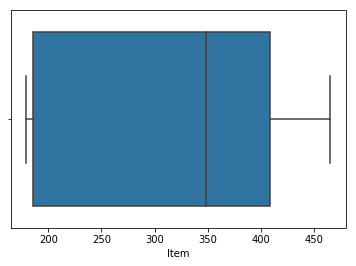

In [47]:
#Visualization of outliers in <Item> column
sns.boxplot(x=data_sales_final['Item'])

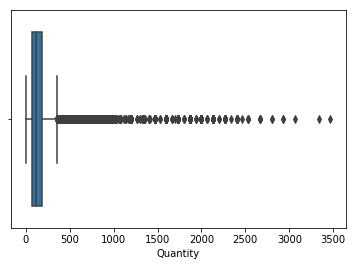

In [48]:
import seaborn as sns
#Visualization of outliers in <Quantity> column
sns.boxplot(x=data_sales_final['Quantity'])

In [49]:
#'True' values shows how many percent each column contains outliers
#Assumption: The values whose percentage of outlier is more than 10% will be dropped

data_IQR=((data_sales_final < (Q1 - 1.5 * IQR))|(data_sales_final  > (Q3 + 1.5 * IQR)))

print("Percent of <Total_Price>:\n",(data_IQR['Total_Price'].value_counts()/len(data_IQR['Total_Price']))*100)
print("Percent of <Item>:\n",(data_IQR['Item'].value_counts()/len(data_IQR['Item']))*100)
print("Percent of <Quantity>:\n",(data_IQR['Quantity'].value_counts()/len(data_IQR['Quantity']))*100)
print("Percent of <Day>:\n",(data_IQR['Day'].value_counts()/len(data_IQR['Day']))*100)
print("Percent of <Store>:\n",(data_IQR['Store'].value_counts()/len(data_IQR['Store']))*100)
print("Percent of <Unit_Price>:\n",(data_IQR['Unit_Price'].value_counts()/len(data_IQR['Unit_Price']))*100)
print("Percent of <Item_Category>:\n",(data_IQR['Item_Category'].value_counts()/len(data_IQR['Item_Category']))*100)
print("Percent of <Month>:\n",(data_IQR['Month'].value_counts()/len(data_IQR['Month']))*100)
print("Percent of <Weekday>:\n",(data_IQR['Weekday'].value_counts()/len(data_IQR['Weekday']))*100)
print("Percent of <Longitude>:\n",(data_IQR['Longitude'].value_counts()/len(data_IQR['Longitude']))*100)
print("Percent of <Latitude>:\n",(data_IQR['Latitude'].value_counts()/len(data_IQR['Latitude']))*100)
print("Percent of <Year>:\n",(data_IQR['Year'].value_counts()/len(data_IQR['Year']))*100)
print("Percent of <Quarter_Q1>:\n",(data_IQR['Quarter_Q1'].value_counts()/len(data_IQR['Quarter_Q1']))*100)
print("Percent of <Quarter_Q2>:\n",(data_IQR['Quarter_Q2'].value_counts()/len(data_IQR['Quarter_Q2']))*100)
print("Percent of <Quarter_Q3>:\n",(data_IQR['Quarter_Q3'].value_counts()/len(data_IQR['Quarter_Q3']))*100)
print("Percent of <Quarter_Q4>:\n",(data_IQR['Quarter_Q4'].value_counts()/len(data_IQR['Quarter_Q4']))*100)

Percent of <Total_Price>:
 False    93.255324
True      6.744676
Name: Total_Price, dtype: float64
Percent of <Item>:
 False    100.0
Name: Item, dtype: float64
Percent of <Quantity>:
 False    92.832285
True      7.167715
Name: Quantity, dtype: float64
Percent of <Day>:
 False    100.0
Name: Day, dtype: float64
Percent of <Store>:
 False    88.858913
True     11.141087
Name: Store, dtype: float64
Percent of <Unit_Price>:
 False    99.937741
True      0.062259
Name: Unit_Price, dtype: float64
Percent of <Item_Category>:
 False    100.0
Name: Item_Category, dtype: float64
Percent of <Month>:
 False    100.0
Name: Month, dtype: float64
Percent of <Weekday>:
 False    100.0
Name: Weekday, dtype: float64
Percent of <Longitude>:
 False    100.0
Name: Longitude, dtype: float64
Percent of <Latitude>:
 False    100.0
Name: Latitude, dtype: float64
Percent of <Year>:
 False    100.0
Name: Year, dtype: float64
Percent of <Quarter_Q1>:
 False    100.0
Name: Quarter_Q1, dtype: float64
Percent of <

In [50]:
data_sales_final2 = data_sales_final[((data_sales_final < (Q1 - 1.5 * IQR)) |(data_sales_final > (Q3 + 1.5 * IQR))).any(axis=1)]

In [51]:
print("The rearranged dimension is",data_sales_final2.shape)

The rearranged dimension is (48097, 16)


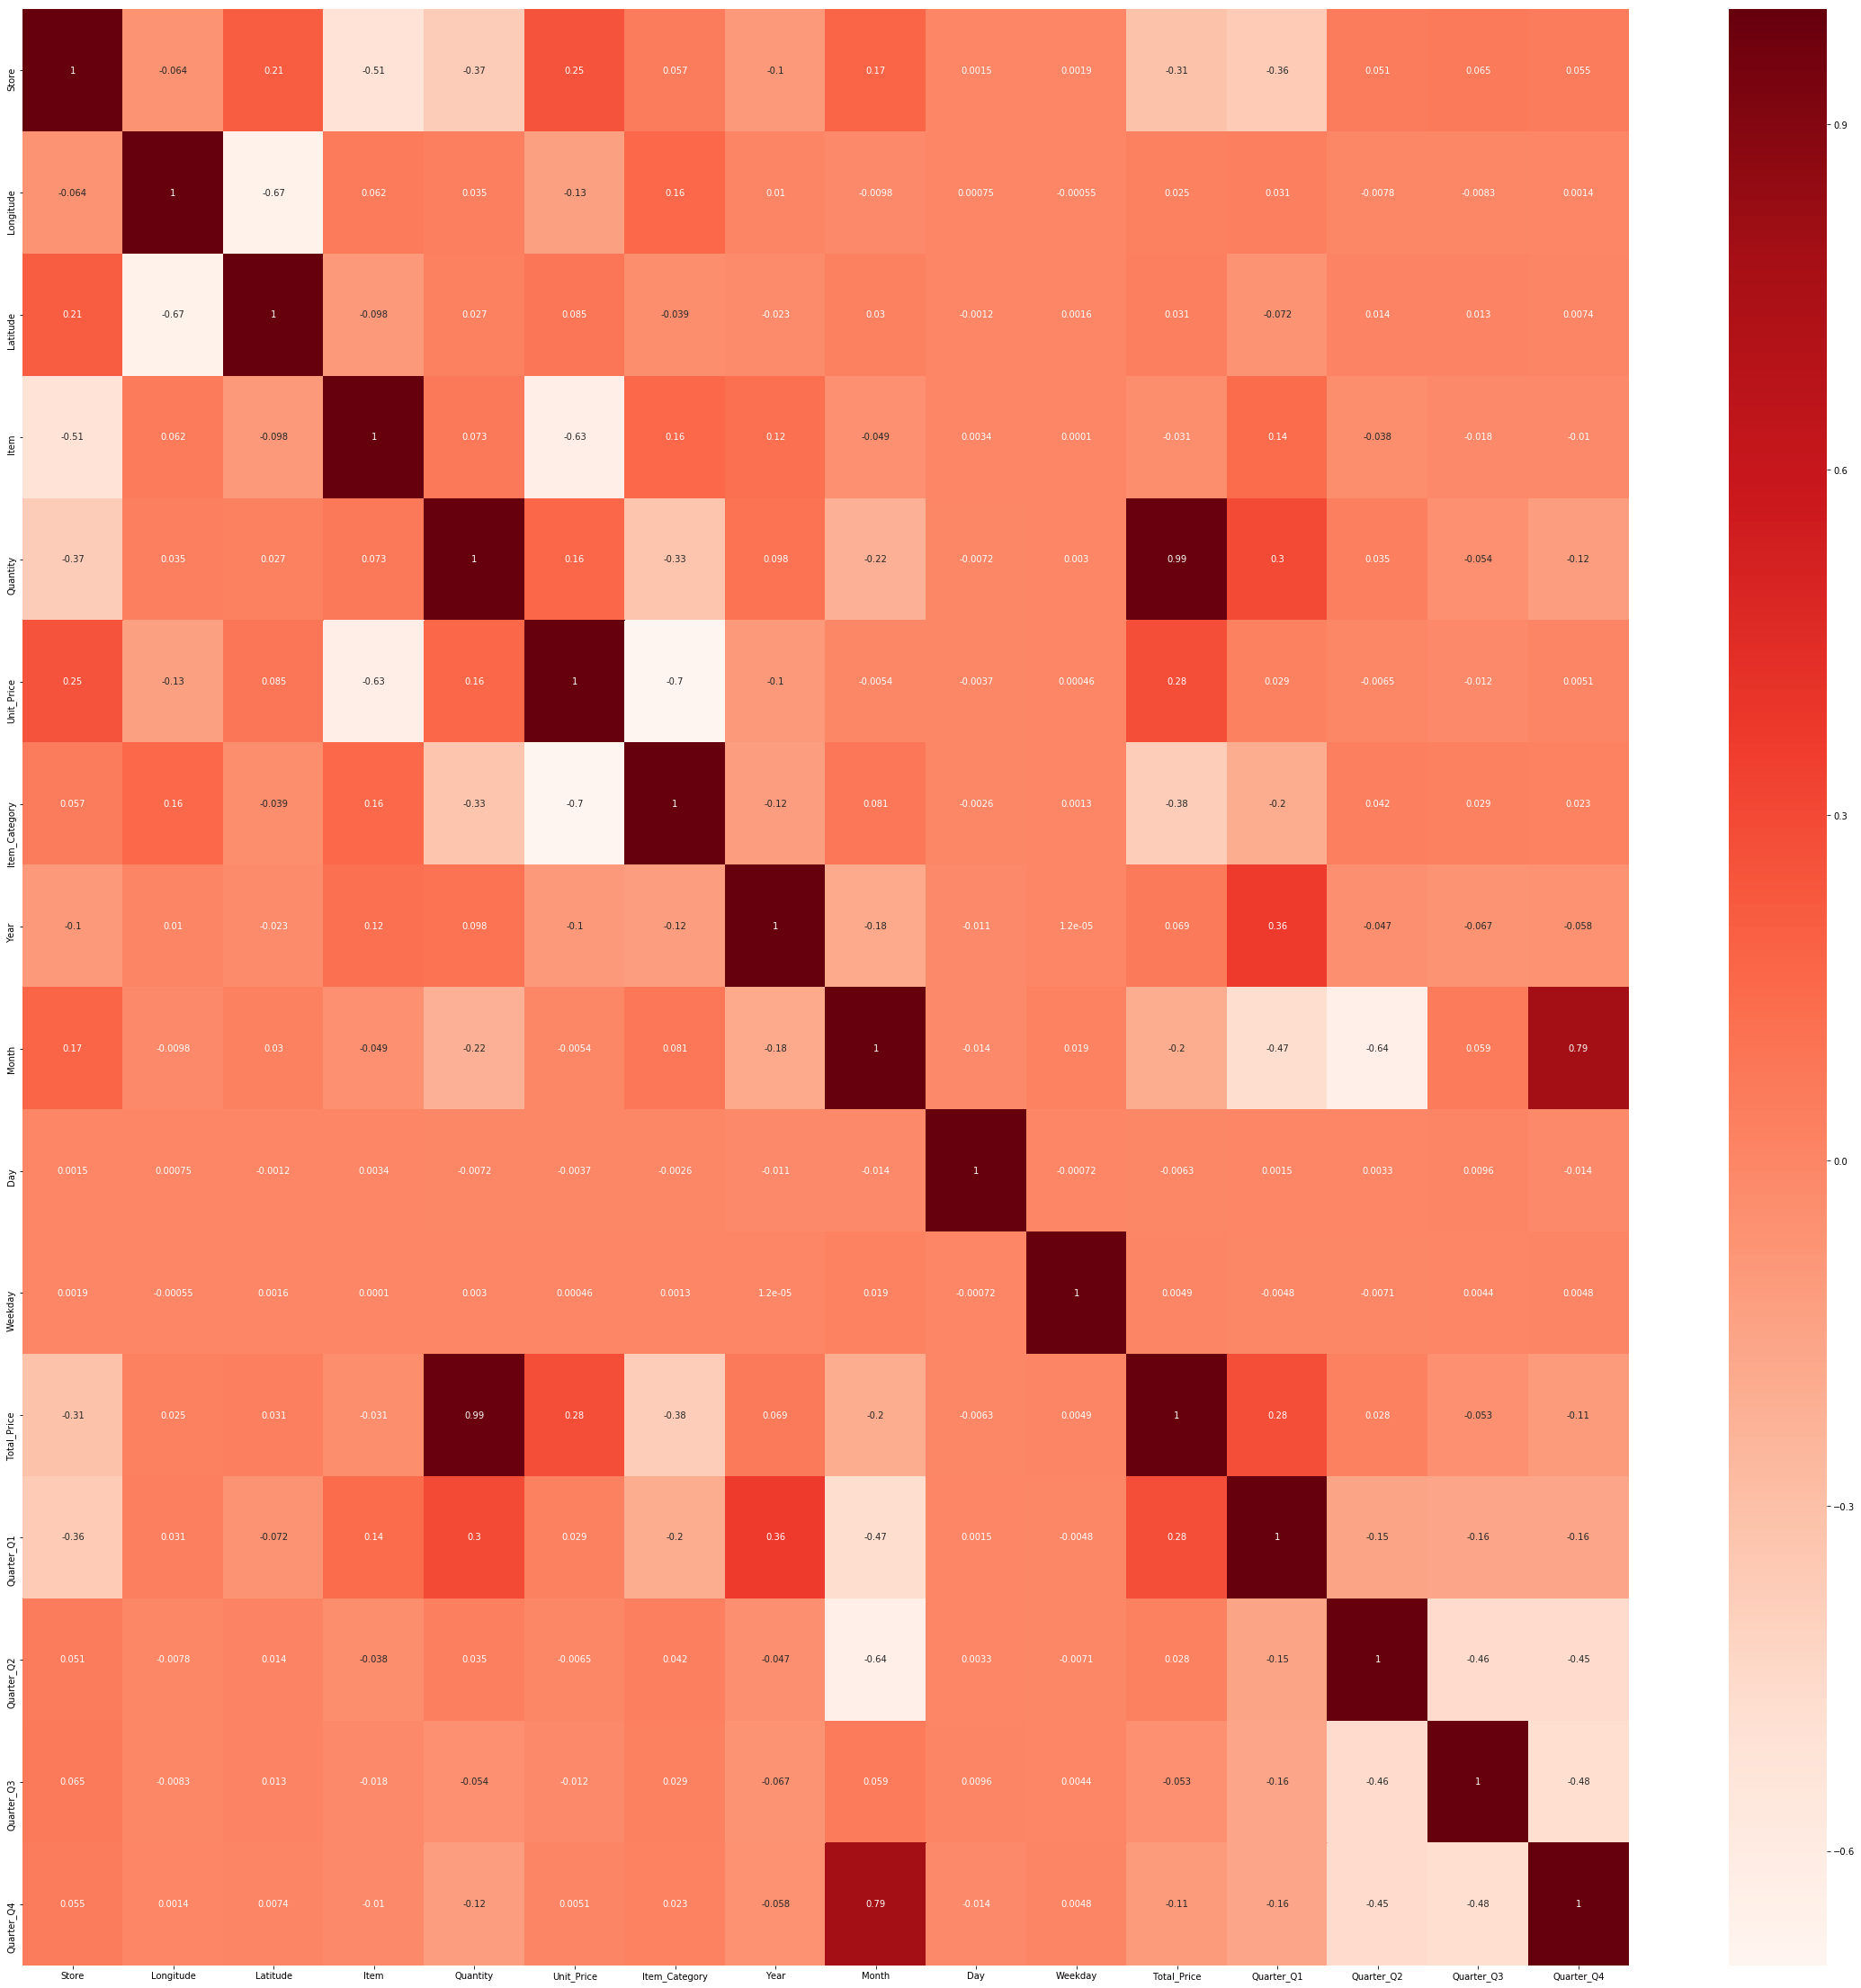

In [52]:
#Correlation matrix is checked
#Multi collinearity is checked based on the strong relationships on correlation matrix
import matplotlib.pyplot as plt 
plt.figure(figsize=(40,40))
cor = data_sales_final2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


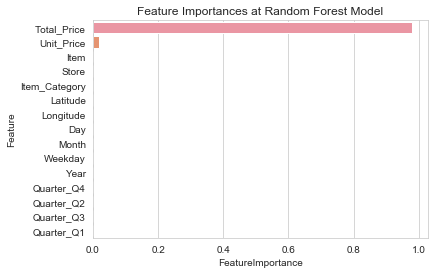

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
X_train  = data_sales_final2['2017-03-15':'2019-03-30'][['Total_Price','Item', 'Day', 'Store', 'Unit_Price', 'Item_Category','Month','Weekday','Longitude','Latitude','Year','Quarter_Q1','Quarter_Q2','Quarter_Q3','Quarter_Q4']]
y_train = data_sales_final2['2017-03-15':'2019-03-30'][['Quantity']]
X_test = data_sales_final2['2019-04'][['Total_Price','Item', 'Day', 'Store', 'Unit_Price', 'Item_Category','Month','Weekday','Longitude','Latitude','Year','Quarter_Q1','Quarter_Q2','Quarter_Q3','Quarter_Q4']]
y_test = data_sales_final2['2019-04'][['Quantity']]
# Assign random_state for randomization. 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())
feature_col_names = X_train.columns
predicted_col_names = y_train.columns
rf_feature = rf_model.feature_importances_
#print(feature_col_names,rf_feature)
feature_importances = pd.DataFrame({'Feature': feature_col_names, 'FeatureImportance': rf_feature}, columns=['Feature', 'FeatureImportance'])
feature_importances = feature_importances.sort_values(by='FeatureImportance', ascending=False)
sns.set_style("whitegrid")
ax = sns.barplot(x="FeatureImportance", y="Feature", data=feature_importances[:15]).set_title("Feature Importances at Random Forest Model")

In [54]:
#because of multicollinearity between <Quantity> and <Total_Price>; I decided to drop <Total_Price>
#Because of multicollinearity between <Month> and <Quarter-4>; I decided to frop <Quarter 4> (<Month> is more important for the target)
#Because of multicollinearity between <Month> and <Quarter-2>; I decided to frop <Quarter 2> (<Month> is more important for the target)
#Because of multicollinearity between <Unit_Price> and <Item_Category>; I decided to frop <Item_Category> (<Unit_Price> is more important for the target)


data_sales_final2=data_sales_final2.drop(['Total_Price', 
                                          'Quarter_Q2',
                                          'Quarter_Q4',
                                          'Item_Category'], axis=1)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


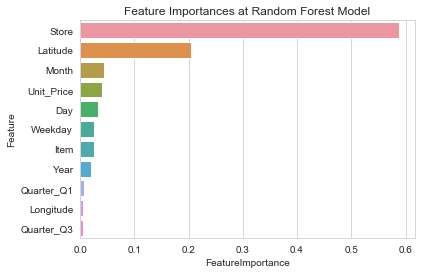

In [55]:
# Random Forest
X_train  = data_sales_final2['2017-03-15':'2019-02-28'][['Item', 'Day', 'Store', 'Unit_Price','Month','Weekday','Longitude','Latitude','Year','Quarter_Q1','Quarter_Q3']]
y_train = data_sales_final2['2017-03-15':'2019-02-28'][['Quantity']]
X_test = data_sales_final2['2019-03'][['Item', 'Day', 'Store', 'Unit_Price','Month','Weekday','Longitude','Latitude','Year','Quarter_Q1','Quarter_Q3']]
y_test = data_sales_final2['2019-03'][['Quantity']]
# Assign random_state for randomization. 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())
feature_col_names = X_train.columns
predicted_col_names = y_train.columns
rf_feature = rf_model.feature_importances_
#print(feature_col_names,rf_feature)
feature_importances = pd.DataFrame({'Feature': feature_col_names, 'FeatureImportance': rf_feature}, columns=['Feature', 'FeatureImportance'])
feature_importances = feature_importances.sort_values(by='FeatureImportance', ascending=False)
sns.set_style("whitegrid")
ax = sns.barplot(x="FeatureImportance", y="Feature", data=feature_importances[:15]).set_title("Feature Importances at Random Forest Model")

In [56]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (47699, 11)
Training Labels Shape: (47699, 1)
Testing Features Shape: (398, 11)
Testing Labels Shape: (398, 1)


In [57]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
#rf.fit(train_features, train_labels);
rf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [63]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

y_prediction = rf_model.predict(X_test)
test_result = y_test.values.ravel()
rf_predict_test = y_prediction.ravel()
result_RF = pd.DataFrame({'Actual': test_result, 'Prediction': list(rf_predict_test)}, columns=['Actual', 'Prediction'])
# Hata Metrikleri
y_true = result_RF.Actual.astype(int)
y_pred = result_RF.Prediction.astype(int)
smape_value = (np.abs(y_true - y_pred) / (y_true + y_pred))
smape_value = smape_value.fillna(0)
result_RF['SMAPE_value'] = smape_value
SMAPE = result_RF['SMAPE_value'].sum() * (100/len(result_RF['SMAPE_value']))
result_RF["Diff"] = y_pred - y_true
result_RF.index = y_test.index
rmse_error = np.sqrt(mean_absolute_error(y_true, y_pred))
mae_error = mean_absolute_error(y_true, y_pred)
mape_error = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("RMSE Error: {0:.4f}".format(rmse_error))
print("MAE Error: {0:.4f}".format(mae_error))
print("MAPE Error: {0:.4f}".format(mape_error))
print('SMAPE Result:',SMAPE)
print('Training Score:',rf_model.score(X_train, y_train))
print('Test Score:', rf_model.score(X_test, y_test))

RMSE Error: 7.2349
MAE Error: 52.3442
MAPE Error: 9.8162
SMAPE Result: 5.109335302629215
Training Score: 0.9888543104195776
Test Score: 0.9168004755542967


In [65]:
# KNN Modeli
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_prediction_KNN = knn.predict(X_test)
test_result_KNN = y_test.values.ravel()
KNN_predict_test = y_prediction_KNN.ravel()
result_KNN = pd.DataFrame({'Actual': test_result_KNN, 'Prediction': list(KNN_predict_test)}, columns=['Actual', 'Prediction'])
# Hata Metrikleri
y_true_KNN = result_KNN.Actual.astype(int)
y_pred_KNN = result_KNN.Prediction.astype(int)
smape_value_KNN = (np.abs(y_true_KNN - y_pred_KNN) / (y_true_KNN + y_pred_KNN))
smape_value_KNN = smape_value_KNN.fillna(0)
result_KNN['SMAPE_value'] = smape_value_KNN
SMAPE_KNN = result_KNN['SMAPE_value'].sum() * (100/len(result_KNN['SMAPE_value']))
result_KNN["Diff"] = y_pred_KNN - y_true_KNN
result_KNN.index = y_test.index
rmse_error = np.sqrt(mean_absolute_error(y_true_KNN, y_pred_KNN))
mae_error = mean_absolute_error(y_true_KNN, y_pred_KNN)
mape_error = np.mean(np.abs((y_true_KNN - y_pred_KNN) / y_true_KNN)) * 100
print("RMSE Error: {0:.4f}".format(rmse_error))
print("MAE Error: {0:.4f}".format(mae_error))
print("MAPE Error: {0:.4f}".format(mape_error))
print('SMAPE Result:',SMAPE_KNN)

RMSE Error: 10.9619
MAE Error: 120.1633
MAPE Error: 25.5076
SMAPE Result: 12.575255899331856


Text(0, 0.5, 'Quantity')

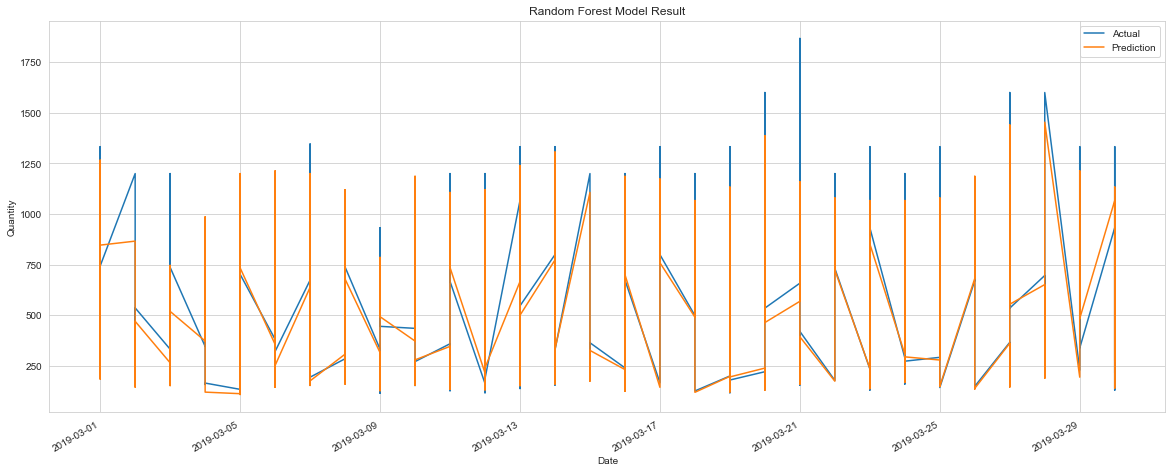

In [66]:
solution1 = result_RF[['Actual','Prediction']]
plt = solution1.plot(figsize=(20,8))
plt.set_title('Random Forest Model Result')
plt.set_xlabel('Date')
plt.set_ylabel('Quantity')

Text(0, 0.5, 'Quantity')

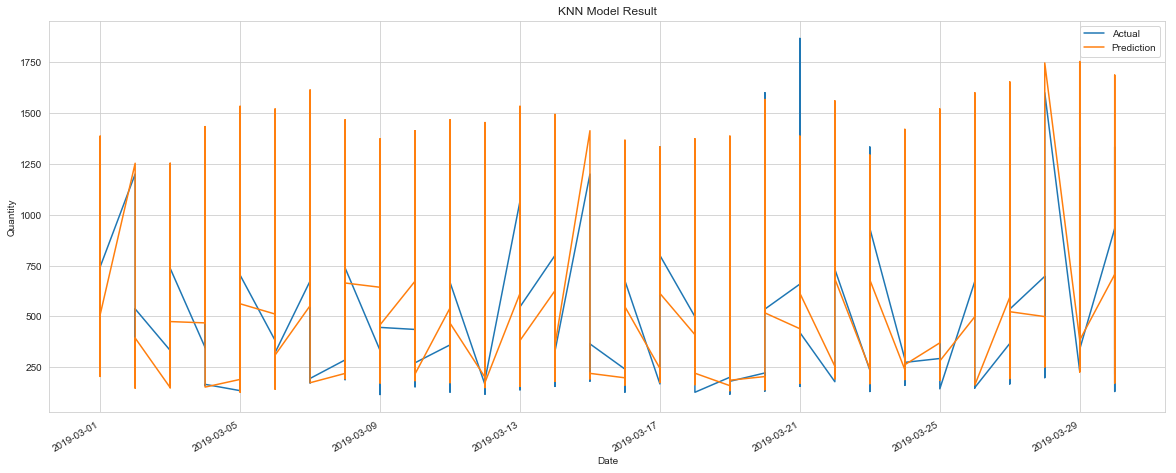

In [67]:
solution2 = result_KNN[['Actual','Prediction']]
plt = solution2.plot(figsize=(20,8))
plt.set_title('KNN Model Result')
plt.set_xlabel('Date')
plt.set_ylabel('Quantity')

In [68]:
#Random Forest gives a better solution
total_result = pd.concat([result_RF, X_test], axis=1, join='inner')
total_result = total_result.sort_values(by='Diff')
total_result = total_result.reset_index(drop=True)
total_result=total_result.drop(['Weekday','Longitude','Latitude','Quarter_Q1','Quarter_Q3','Unit_Price'], axis=1)
total_result = total_result[['Year','Month','Day','Store','Item','Actual','Prediction', 'Diff','SMAPE_value']]
total_result

,Year,Month,Day,Store,Item,Actual,Prediction,Diff,SMAPE_value
0,2019,3,21,32,385,1867,1159.8,-708,0.233972
1,2019,3,18,91,385,1200,706.9,-494,0.259182
2,2019,3,3,32,385,1200,746.9,-454,0.233299
3,2019,3,13,91,385,1067,667.0,-400,0.230681
4,2019,3,6,91,385,1067,667.0,-400,0.230681
5,2019,3,6,74,186,1042,653.9,-389,0.229499
6,2019,3,4,91,385,933,547.5,-386,0.260811
7,2019,3,2,32,385,1200,866.6,-334,0.161665
8,2019,3,3,91,385,800,524.8,-276,0.208459
9,2019,3,20,91,385,1067,800.0,-267,0.143010


In [69]:
writer = pd.ExcelWriter('result.xlsx')
total_result.to_excel(writer,'Sheet1')
writer.save()